In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
USAhousing = pd.read_csv('USA_Housing.csv')

In [3]:
USAhousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
df = USAhousing.iloc[:,:-1]

In [5]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [6]:
from sklearn.preprocessing import StandardScaler
scaled = StandardScaler()

In [7]:
scaled.fit(df.drop('Price',axis=1))
scaled_features = scaled.transform(df.drop('Price',axis=1))

In [8]:
df_feat = pd.DataFrame(data=scaled_features,columns=df.columns[:-1])

In [9]:
df_feat.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,1.028660,-0.296927,0.021274,0.088062,-1.317599
1,1.000808,0.025902,-0.255506,-0.722301,0.403999
2,-0.684629,-0.112303,1.516243,0.930840,0.072410
3,-0.491499,1.221572,-1.393077,-0.584540,-0.186734
4,-0.807073,-0.944834,0.846742,0.201513,-0.988387


In [11]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [12]:
dtr = DecisionTreeRegressor()

In [13]:
X = df_feat
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [14]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [15]:
predict = dtr.predict(X_test)

In [16]:
print("MAE",metrics.mean_absolute_error(y_test,predict))
print("MSE",metrics.mean_squared_error(y_test,predict))

MAE 142133.6549027824
MSE 32379482670.375027


In [17]:
dtr.score(X_train,y_train)

1.0

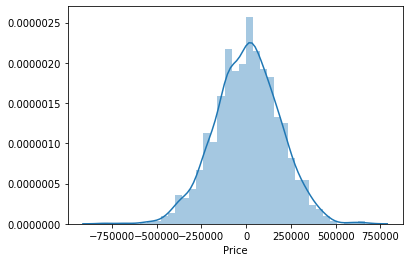

In [18]:
sns.distplot((y_test-predict))

In [20]:
from sklearn.svm import SVR
svc = SVR()

In [21]:
svc.fit(X_train,y_train)

c:\users\tagme\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [22]:
svc_predict = svc.predict(X_test)

In [23]:
print('MAE:',metrics.mean_absolute_error(y_test,svc_predict))
print('MSE:',metrics.mean_squared_error(y_test,svc_predict))

MAE: 280699.3784182775
MSE: 123176985121.47119


In [24]:
svc.score(X_train,y_train)

0.000681262317606679

In [25]:
param = {'C':[0.1,1,10,100,1000],'gamma':[0.1,0.01,0.001,1,0.0001]}

In [28]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(svc,param,verbose=3)
gs.fit(X_train,y_train)

c:\users\tagme\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................... C=0.1, gamma=0.1, score=-0.000, total=   0.4s
[CV] C=0.1, gamma=0.1 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] .................... C=0.1, gamma=0.1, score=0.000, total=   0.3s
[CV] C=0.1, gamma=0.1 ................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV] .................... C=0.1, gamma=0.1, score=0.000, total=   0.3s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] .................. C=0.1, gamma=0.01, score=-0.000, total=   0.3s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] .................. C=0.1, gamma=0.01, score=-0.000, total=   0.4s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] .................. C=0.1, gamma=0.01, score=-0.000, total=   0.3s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ................. C=0.1, gamma=0.001, score=-0.000, total=   0.3s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ................. C=0.1, gamma=0.001, score=-0.000, total=   0.3s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ................. C=0.1, gamma=0.001, score=-0.000, total=   0.3s
[CV] C=0.1, gamma=1 ..................................................
[CV] .

[CV] ................... C=1000, gamma=0.1, score=0.476, total=   0.3s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ................... C=1000, gamma=0.1, score=0.480, total=   0.3s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ................... C=1000, gamma=0.1, score=0.485, total=   0.3s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .................. C=1000, gamma=0.01, score=0.151, total=   0.3s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .................. C=1000, gamma=0.01, score=0.157, total=   0.4s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .................. C=1000, gamma=0.01, score=0.156, total=   0.4s
[CV] C=1000, gamma=0.001 .............................................
[CV] ................. C=1000, gamma=0.001, score=0.017, total=   0.3s
[CV] C=1000, gamma=0.001 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   25.8s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [0.1, 0.01, 0.001, 1, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [29]:
gs.best_params_

{'C': 1000, 'gamma': 0.1}

In [30]:
gs_predict = gs.predict(X_test)

In [31]:
print("MAE",metrics.mean_absolute_error(y_test,gs_predict))
print("MSE",metrics.mean_squared_error(y_test,gs_predict))

MAE 169047.8678397209
MSE 48946841752.62823


In [32]:
gs.score(X_train,y_train)

0.6143980878495732

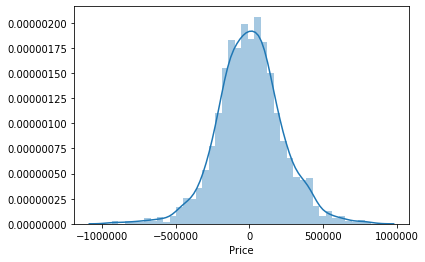

In [33]:
sns.distplot((y_test-gs_predict))